In [2]:
import numpy as np
from sklearn.linear_model import LinearRegression
from scipy import stats
import matplotlib.pyplot as plt

In [3]:
k = 50
x_min_range = 0
x_max_range = 100 + 1

# random
alpha = 0.3
slope = 2.
intercept = 1.

In [4]:
noise = np.random.normal(-alpha, alpha, k)
noise

array([-0.63100486, -0.27909655, -0.05165781, -0.43093305, -0.14958413,
       -0.56959708,  0.27230837, -0.62082218, -0.20488907, -0.21475655,
       -0.19731012, -0.51186238, -0.92245497, -0.61780753, -0.32122895,
       -0.08559755,  0.02541674, -0.37870915, -0.32365929, -0.5963917 ,
       -0.00492315, -0.49544668, -0.3610568 ,  0.11912101, -0.17119896,
       -0.53851973,  0.26238462,  0.01103057, -0.0028004 , -0.00341622,
        0.11153314, -0.489109  , -0.41500179,  0.23562288, -0.38955641,
        0.01301392, -0.38087309, -0.53431544, -0.06760074, -0.51125571,
       -0.17915313, -0.39151906,  0.0268005 , -0.09280116, -0.21981759,
        0.01687306, -0.44434364, -0.8757178 , -0.6030389 , -0.21648194])

In [5]:
X = np.random.randint(x_min_range, x_max_range, k)
X

array([ 86,  16,  73,  95,   4,  84,  39,  30,  15,  79,  25,  83,  95,
       100,  12,  61,  61,  84, 100,  80,  16,  56,  75,  82,  78,  14,
        32,  87,  45,  62,  11,  29,   6,  56,  39,  16,  16,  81,  49,
        34,  45,  73,   4,  68,   1,  46,  33,  10,  89,  59])

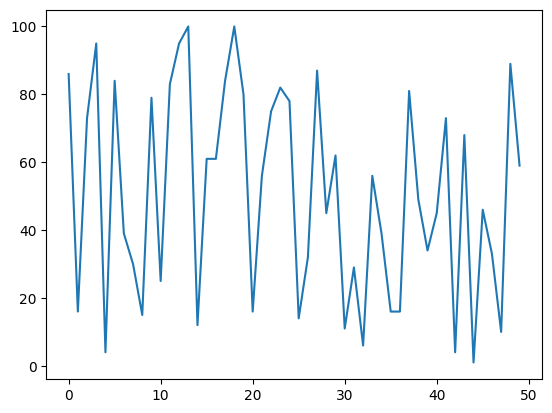

In [6]:
plt.plot(X)

In [7]:
x = np.random.uniform(x_min_range, x_max_range, k)
x

array([ 25.35917762,  59.34350007,  67.23278743,  55.46166729,
         2.84599092,   6.90771235,  92.29892945,  36.10674402,
        81.64988249,  63.27227067,  16.10524747,  96.79849056,
        35.90546994,  88.68202658,  16.86741972, 100.20187031,
        82.78800736,  82.96141499,  42.92696946,  24.585523  ,
        78.38324178,  87.37790217,  24.4764399 ,  13.04863082,
        85.12065625,  32.21059927,  60.66706613,   4.62616869,
        22.03490065,  20.46081491,  89.3312181 ,  27.359258  ,
        43.66911558,  19.35047339,  85.83976178,  73.48513729,
        49.84082415,  66.78474037,  68.38953661,  16.52111917,
        78.07388868,  49.3365947 ,  11.22197398,  99.89702236,
        12.3000288 ,  25.08580058,  25.45027366,  27.03147977,
        44.56641991,  82.31535252])

In [8]:
y = slope * x + intercept + noise
y

array([ 51.08735038, 119.40790358, 135.41391704, 111.49240154,
         6.54239772,  14.24582763, 185.87016727,  72.59266587,
       164.09487592, 127.32978479,  33.01318481, 194.08511875,
        71.88848491, 177.74624562,  34.4136105 , 201.31814306,
       166.60143145, 166.54412082,  86.53027963,  49.57465431,
       157.76156041, 175.26035765,  49.59182301,  27.21638265,
       171.07011354,  64.88267881, 122.59651688,  10.26336795,
        45.0670009 ,  41.91821361, 179.77396934,  55.229407  ,
        87.92322937,  39.93656966, 172.28996715, 147.9832885 ,
       100.30077522, 134.03516531, 137.71147249,  33.53098262,
       156.96862423,  99.28167034,  23.47074846, 200.70124356,
        25.38024   ,  51.18847423,  51.45620369,  54.18724175,
        89.52980093, 165.4142231 ])

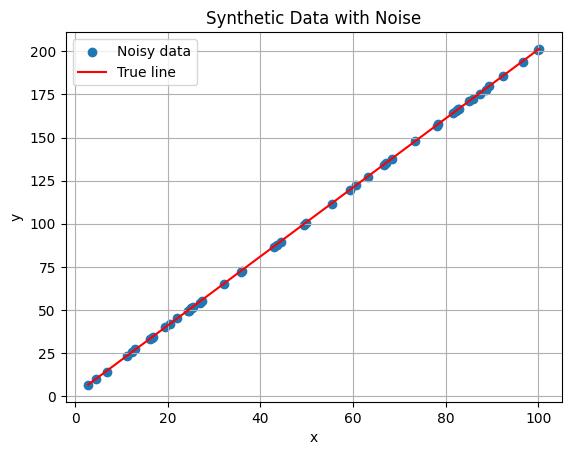

In [9]:
plt.scatter(x, y, label='Noisy data')
plt.plot(np.sort(x), slope * np.sort(x) + intercept, color='red', label='True line')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Synthetic Data with Noise')
plt.legend()
plt.grid(True)

In [10]:
def calculate_linear_regression_params(num_iterations, num_samples, learning_rate = 0.01, tolerance=1e-6):
    loss_history = []
    slope = 2.
    intercept = 1.
    for i in range(num_iterations):
        y_pred = slope * x + intercept
        error = y - y_pred
        loss = (1 / (2 * num_samples)) * np.sum(error**2)
        loss_history.append(loss)

        # gradiant
        grad_m = (-1 / num_samples) * np.sum(error * x)
        grad_b = (-1 / num_samples) * np.sum(error)

        # updateing parameters 
        slope -= learning_rate * grad_m
        intercept -= learning_rate * grad_b

        # check the stop condition
        if np.abs(learning_rate * grad_m) < tolerance and np.abs(learning_rate * grad_b) < tolerance:
            print(f"Stopped at iteration {i}")
            break
    return loss_history

In [11]:
result = calculate_linear_regression_params(100, k)
rounded = [np.round(x) for x in result]
rounded

[np.float64(0.0),
 np.float64(24.0),
 np.float64(26360.0),
 np.float64(28812492.0),
 np.float64(31492630643.0),
 np.float64(34422075595717.0),
 np.float64(3.762401755936694e+16),
 np.float64(4.112380421021716e+19),
 np.float64(4.494914106532566e+22),
 np.float64(4.913031080934321e+25),
 np.float64(5.370041302267936e+28),
 np.float64(5.869562620918626e+31),
 np.float64(6.415549419766113e+34),
 np.float64(7.012323918442085e+37),
 np.float64(7.664610389510125e+40),
 np.float64(8.377572557435147e+43),
 np.float64(9.15685447640558e+46),
 np.float64(1.000862521061107e+50),
 np.float64(1.0939627670680323e+53),
 np.float64(1.1957231992885059e+56),
 np.float64(1.3069493883678266e+59),
 np.float64(1.4285218391442276e+62),
 np.float64(1.5614029610285717e+65),
 np.float64(1.706644686768872e+68),
 np.float64(1.8653967999123845e+71),
 np.float64(2.038916036888361e+74),
 np.float64(2.2285760357666521e+77),
 np.float64(2.435878210449989e+80),
 np.float64(2.662463636383785e+83),
 np.float64(2.910126041

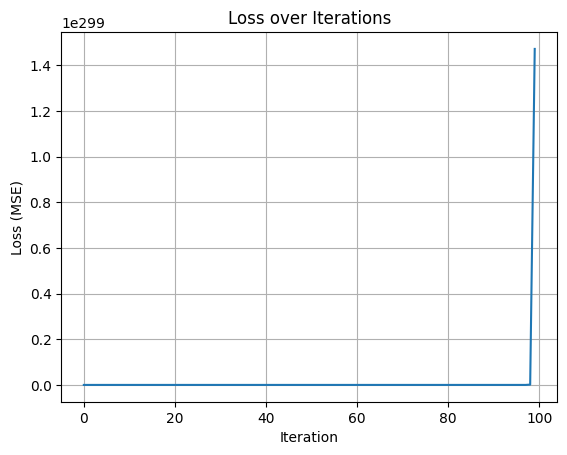

In [12]:
plt.plot(rounded)
plt.xlabel('Iteration')
plt.ylabel('Loss (MSE)')
plt.title('Loss over Iterations')
plt.grid(True)


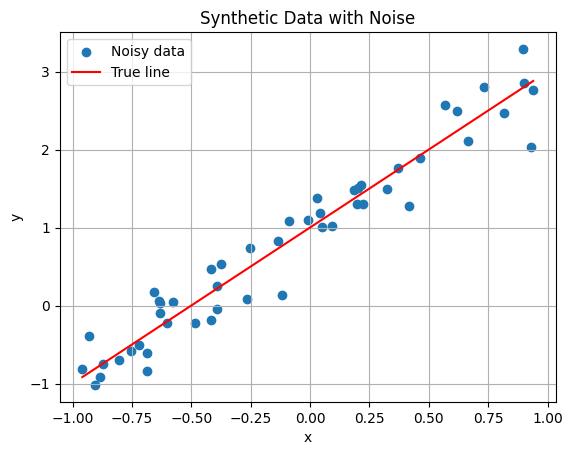

Iteration 0, Loss: 0.978879
Iteration 100, Loss: 0.442229
Iteration 200, Loss: 0.239934
Iteration 300, Loss: 0.143999
Iteration 400, Loss: 0.094957
Iteration 500, Loss: 0.069378
Iteration 600, Loss: 0.055970
Iteration 700, Loss: 0.048933
Iteration 800, Loss: 0.045238
Iteration 900, Loss: 0.043298

✅ Estimated m: 1.8820, Estimated b: 0.9820
🎯 True m: 2.0, True b: 1.0


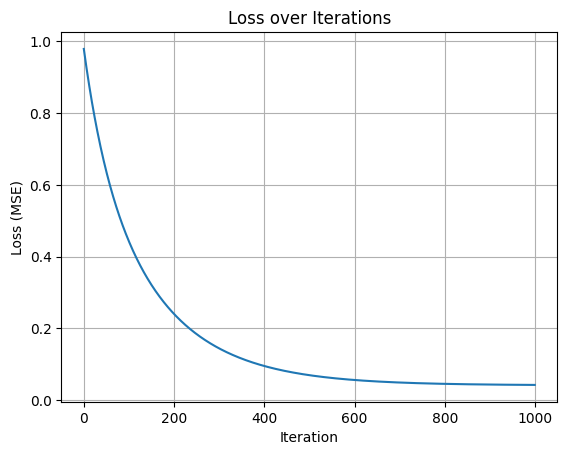

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# --- تولید داده ---
np.random.seed(42)  # برای تکرارپذیری

true_m = 2.0
true_b = 1.0
a = 0.1  # واریانس نویز
noise_std = np.sqrt(a)
K = 50  # تعداد نمونه‌ها

x = np.random.uniform(-1, 1, K)
noise = np.random.normal(0, noise_std, K)
y = true_m * x + true_b + noise

# رسم داده‌ها
plt.scatter(x, y, label='Noisy data')
plt.plot(np.sort(x), true_m * np.sort(x) + true_b, color='red', label='True line')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Synthetic Data with Noise')
plt.legend()
plt.grid(True)
plt.show()

# --- الگوریتم گرادیان نزولی ---
m = 0.0
b = 0.0
learning_rate = 0.01
num_iterations = 1000
tolerance = 1e-6

loss_history = []

for i in range(num_iterations):
    y_pred = m * x + b
    error = y - y_pred
    loss = (1 / (2 * K)) * np.sum(error**2)
    loss_history.append(loss)

    # گرادیان‌ها
    grad_m = (-1 / K) * np.sum(error * x)
    grad_b = (-1 / K) * np.sum(error)

    # آپدیت پارامترها
    m -= learning_rate * grad_m
    b -= learning_rate * grad_b

    # نمایش وضعیت
    if i % 100 == 0:
        print(f"Iteration {i}, Loss: {loss:.6f}")

    if np.abs(learning_rate * grad_m) < tolerance and np.abs(learning_rate * grad_b) < tolerance:
        print(f"Stopped at iteration {i} due to tolerance.")
        break

print(f"\n✅ Estimated m: {m:.4f}, Estimated b: {b:.4f}")
print(f"🎯 True m: {true_m}, True b: {true_b}")

# --- نمودار روند کاهش خطا ---
plt.plot(loss_history)
plt.xlabel('Iteration')
plt.ylabel('Loss (MSE)')
plt.title('Loss over Iterations')
plt.grid(True)
plt.show()


Noise a=0.1
Estimated m = 1.8820, b = 0.9820
Noise a=0.3
Estimated m = 1.8572, b = 0.9787
Noise a=0.5
Estimated m = 1.8401, b = 0.9765


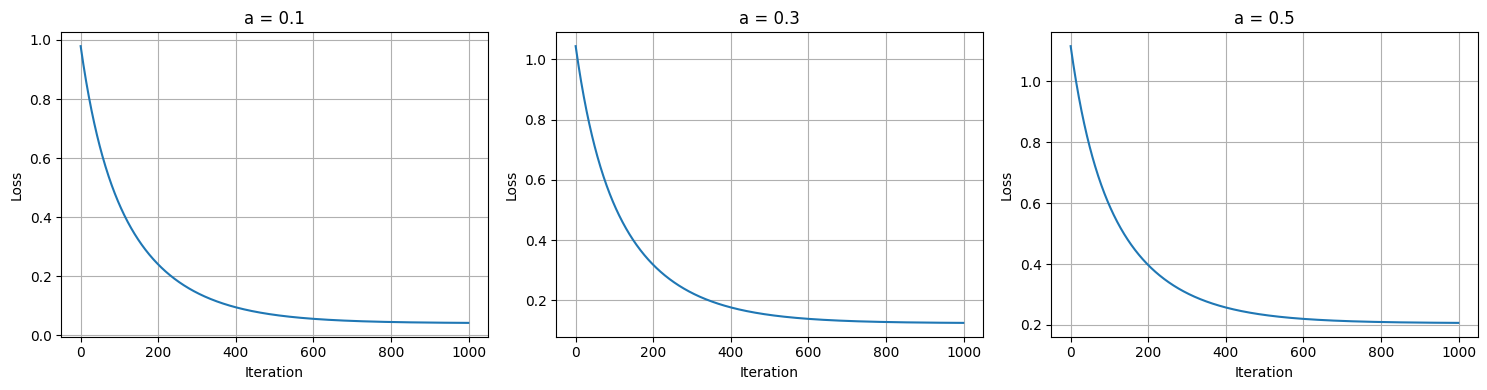

In [14]:
def generate_data(a, K=50):
    noise_std = np.sqrt(a)
    x = np.random.uniform(-1, 1, K)
    noise = np.random.normal(0, noise_std, K)
    y = true_m * x + true_b + noise
    return x, y

def gradient_descent(x, y, lr=0.01, num_iter=1000, tol=1e-6):
    K = len(x)
    m, b = 0.0, 0.0
    loss_history = []
    for i in range(num_iter):
        y_pred = m * x + b
        error = y - y_pred
        loss = (1 / (2 * K)) * np.sum(error**2)
        loss_history.append(loss)

        grad_m = (-1 / K) * np.sum(error * x)
        grad_b = (-1 / K) * np.sum(error)

        m -= lr * grad_m
        b -= lr * grad_b

        if np.abs(lr * grad_m) < tol and np.abs(lr * grad_b) < tol:
            break

    return m, b, loss_history

# پارامترهای واقعی
true_m, true_b = 2.0, 1.0
noise_levels = [0.1, 0.3, 0.5]

plt.figure(figsize=(15, 4))
for i, a in enumerate(noise_levels):
    np.random.seed(42)  # برای مقایسه منصفانه
    x, y = generate_data(a)
    m_hat, b_hat, losses = gradient_descent(x, y)
    
    print(f"Noise a={a}")
    print(f"Estimated m = {m_hat:.4f}, b = {b_hat:.4f}")
    
    plt.subplot(1, 3, i+1)
    plt.plot(losses)
    plt.title(f"a = {a}")
    plt.xlabel("Iteration")
    plt.ylabel("Loss")
    plt.grid(True)

plt.tight_layout()
plt.show()

K = 10
Estimated m = 2.1785, b = 0.8198
K = 50
Estimated m = 1.8820, b = 0.9820
K = 200
Estimated m = 1.9239, b = 1.0178


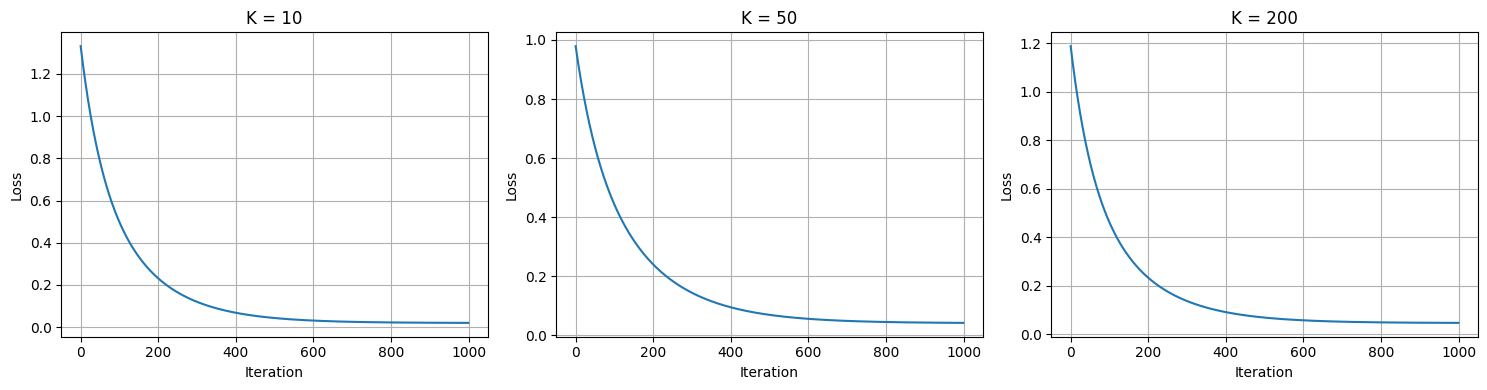

In [15]:
import numpy as np
import matplotlib.pyplot as plt

def generate_data(a, K):
    noise_std = np.sqrt(a)
    x = np.random.uniform(-1, 1, K)
    noise = np.random.normal(0, noise_std, K)
    y = true_m * x + true_b + noise
    return x, y

def gradient_descent(x, y, lr=0.01, num_iter=1000, tol=1e-6):
    K = len(x)
    m, b = 0.0, 0.0
    loss_history = []
    for i in range(num_iter):
        y_pred = m * x + b
        error = y - y_pred
        loss = (1 / (2 * K)) * np.sum(error**2)
        loss_history.append(loss)

        grad_m = (-1 / K) * np.sum(error * x)
        grad_b = (-1 / K) * np.sum(error)

        m -= lr * grad_m
        b -= lr * grad_b

        if np.abs(lr * grad_m) < tol and np.abs(lr * grad_b) < tol:
            break

    return m, b, loss_history

# پارامترهای اصلی
true_m, true_b = 2.0, 1.0
a = 0.1  # نویز ثابت
sample_sizes = [10, 50, 200]

plt.figure(figsize=(15, 4))
for i, K in enumerate(sample_sizes):
    np.random.seed(42)
    x, y = generate_data(a, K)
    m_hat, b_hat, losses = gradient_descent(x, y)

    print(f"K = {K}")
    print(f"Estimated m = {m_hat:.4f}, b = {b_hat:.4f}")

    plt.subplot(1, 3, i+1)
    plt.plot(losses)
    plt.title(f"K = {K}")
    plt.xlabel("Iteration")
    plt.ylabel("Loss")
    plt.grid(True)

plt.tight_layout()
plt.show()


Learning Rate = 0.001
Estimated m = 0.5018, b = 0.5155
Learning Rate = 0.01
Estimated m = 1.8820, b = 0.9820
Learning Rate = 0.1
Estimated m = 1.9646, b = 0.9952


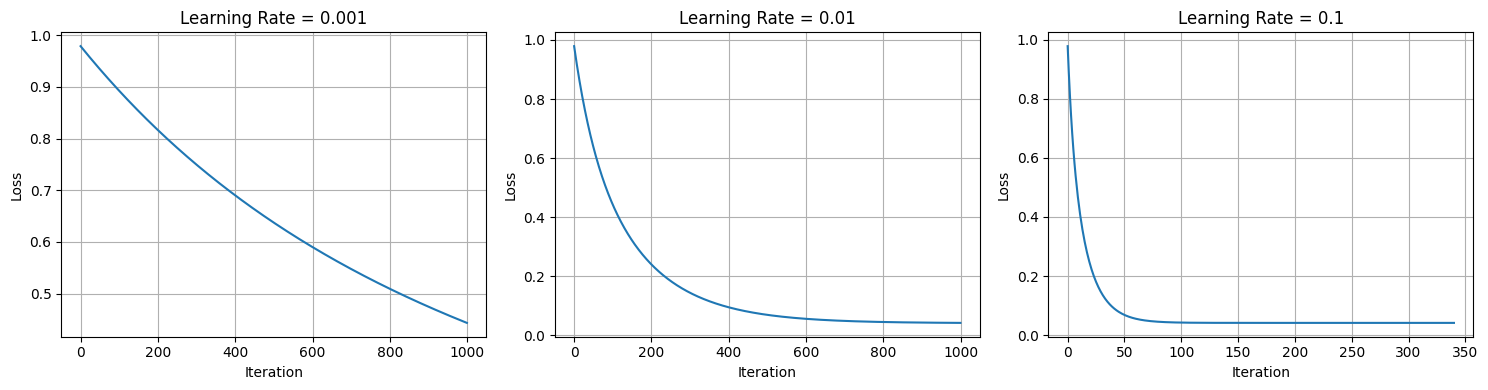

In [16]:
import numpy as np
import matplotlib.pyplot as plt

def generate_data(a, K):
    noise_std = np.sqrt(a)
    x = np.random.uniform(-1, 1, K)
    noise = np.random.normal(0, noise_std, K)
    y = true_m * x + true_b + noise
    return x, y

def gradient_descent(x, y, lr=0.01, num_iter=1000, tol=1e-6):
    K = len(x)
    m, b = 0.0, 0.0
    loss_history = []
    for i in range(num_iter):
        y_pred = m * x + b
        error = y - y_pred
        loss = (1 / (2 * K)) * np.sum(error**2)
        loss_history.append(loss)

        grad_m = (-1 / K) * np.sum(error * x)
        grad_b = (-1 / K) * np.sum(error)

        m -= lr * grad_m
        b -= lr * grad_b

        if np.abs(lr * grad_m) < tol and np.abs(lr * grad_b) < tol:
            break

    return m, b, loss_history

# ثابت‌ها
true_m, true_b = 2.0, 1.0
a = 0.1
K = 50
learning_rates = [0.001, 0.01, 0.1]

# تولید داده ثابت
np.random.seed(42)
x, y = generate_data(a, K)

plt.figure(figsize=(15, 4))
for i, lr in enumerate(learning_rates):
    m_hat, b_hat, losses = gradient_descent(x, y, lr=lr)

    print(f"Learning Rate = {lr}")
    print(f"Estimated m = {m_hat:.4f}, b = {b_hat:.4f}")

    plt.subplot(1, 3, i+1)
    plt.plot(losses)
    plt.title(f"Learning Rate = {lr}")
    plt.xlabel("Iteration")
    plt.ylabel("Loss")
    plt.grid(True)

plt.tight_layout()
plt.show()


In [17]:
import numpy as np

def generate_data(a, K):
    noise_std = np.sqrt(a)
    x = np.random.uniform(-1, 1, K)
    noise = np.random.normal(0, noise_std, K)
    y = true_m * x + true_b + noise
    return x, y

def gradient_descent(x, y, lr=0.01, num_iter=1000, tol=1e-6):
    K = len(x)
    m, b = 0.0, 0.0
    for _ in range(num_iter):
        y_pred = m * x + b
        error = y - y_pred
        grad_m = (-1 / K) * np.sum(error * x)
        grad_b = (-1 / K) * np.sum(error)
        m -= lr * grad_m
        b -= lr * grad_b
        if np.abs(lr * grad_m) < tol and np.abs(lr * grad_b) < tol:
            break
    return m, b

def closed_form_solution(x, y):
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    m = np.sum((x - x_mean)*(y - y_mean)) / np.sum((x - x_mean)**2)
    b = y_mean - m * x_mean
    return m, b

# تنظیمات
true_m, true_b = 2.0, 1.0
a = 0.1
K = 50
np.random.seed(42)

x, y = generate_data(a, K)
m_gd, b_gd = gradient_descent(x, y)
m_closed, b_closed = closed_form_solution(x, y)

print(f"🔧 Gradient Descent: m = {m_gd:.4f}, b = {b_gd:.4f}")
print(f"📐 Closed Form     : m = {m_closed:.4f}, b = {b_closed:.4f}")
print(f"🎯 True Values     : m = {true_m}, b = {true_b}")


🔧 Gradient Descent: m = 1.8820, b = 0.9820
📐 Closed Form     : m = 1.9647, b = 0.9952
🎯 True Values     : m = 2.0, b = 1.0
